In [ ]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('ai4i2020.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, mean_squared_error

In [8]:
target_classification = 'Machine failure'
target_regression = 'Torque [Nm]'
drop_columns = ['UDI', 'Product ID']

In [9]:
X = df.drop(columns=drop_columns + [target_classification, target_regression])
y_classification = df[target_classification]
y_regression = df[target_regression]

In [10]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

In [12]:
X_transformed = preprocessor.fit_transform(X)

In [13]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_transformed, y_classification, test_size=0.2, random_state=42
)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_transformed, y_regression, test_size=0.2, random_state=42
)

In [14]:
clf_model = LogisticRegression(max_iter=1000, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_model.predict(X_test_clf)

In [15]:
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

In [16]:
clf_report = classification_report(y_test_clf, y_pred_clf)
mse = mean_squared_error(y_test_reg, y_pred_reg)

clf_report, np.sqrt(mse)

('              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1939\n           1       1.00      0.97      0.98        61\n\n    accuracy                           1.00      2000\n   macro avg       1.00      0.98      0.99      2000\nweighted avg       1.00      1.00      1.00      2000\n',
 np.float64(4.406192201586942))

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

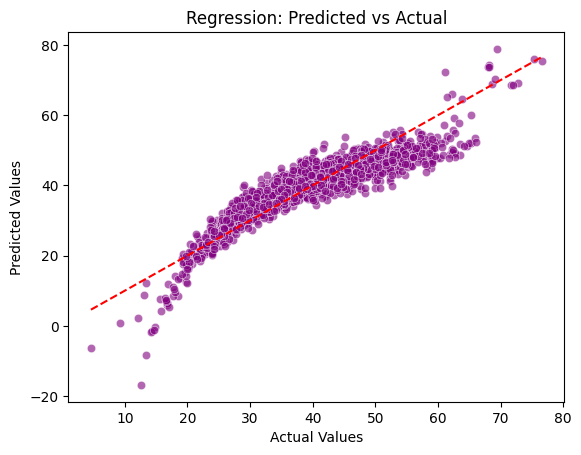

In [19]:
pred_vs_actual = pd.DataFrame({'Actual': y_test_reg, 'Predicted': y_pred_reg})

sns.scatterplot(x='Actual', y='Predicted', data=pred_vs_actual, color='purple', alpha=0.6)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression: Predicted vs Actual')
plt.show()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,0,0,0,0,0,0
1,L,298.2,308.7,1408,3,0,0,0,0,0
2,L,298.1,308.5,1498,5,0,0,0,0,0
3,L,298.2,308.6,1433,7,0,0,0,0,0
4,L,298.2,308.7,1408,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,14,0,0,0,0,0
9996,H,298.9,308.4,1632,17,0,0,0,0,0
9997,M,299.0,308.6,1645,22,0,0,0,0,0
9998,H,299.0,308.7,1408,25,0,0,0,0,0
